In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Describing Relationships: Correlation

Is there a relationship between your IQ and the wealth of your parents? Between your computer skills and your GPA?

Answers to these questions require us to describe the relationship between pairs of variables. The original data must consist of actual **pairs of observations**, such as, IQ scores and parents’ wealth for each member of the freshman class. Two variables are related if pairs of scores show an orderliness that can be depicted graphically with a **scatterplot** and **numerically** with a correlation coefficient.

Relationships between pairs of variables can be categorized into:
- **Positive** Relationship: Two variables are positively related if pairs of scores tend to occupy similar relative positions (high with high and low with low) in their respective distributions
- **Negative** Relationship: Two variables are negatively related if pairs of scores tend to occupy dissimilar relative positions (high with low and vice versa) in their respective distributions.
- Little or No Relationship

In [60]:
df = sns.load_dataset('iris')

In [63]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


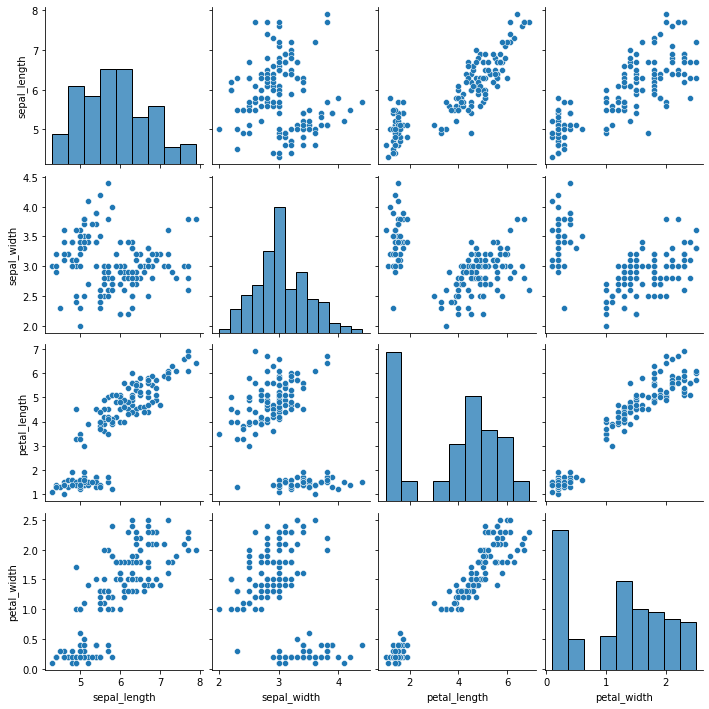

In [4]:
sns.pairplot(df)

<AxesSubplot:xlabel='carat', ylabel='price'>

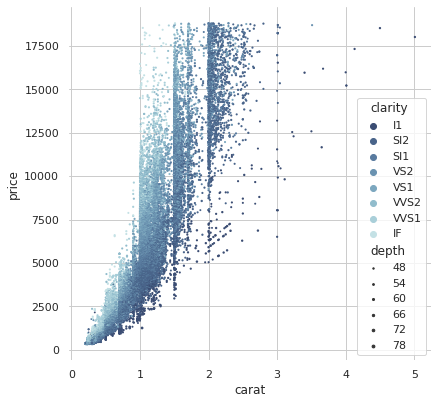

In [42]:
sns.set_theme(style="whitegrid")

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(
    x="carat", y="price",
    hue="clarity", size="depth",
    palette="ch:r=-.2,d=.3_r",
    hue_order=clarity_ranking,
    sizes=(1, 8), linewidth=0,
    data=diamonds, ax=ax
)

## Relationship Types

### Positive, Negative, or Little or No Relationship?

The first step is to note the tilt or slope, if any, of a dot cluster. A dot cluster that has a slope from the lower left to the upper right reflects a **positive relationship**.

On the other hand, a dot cluster that has a slope from the upper left to the lower right reflects a **negative relationship**.

Finally, a dot cluster that lacks any apparent slope reflects **little or no relationship**.

### Strong or Weak Relationship?
Having established that a relationship is either positive or negative, note how closely the dot cluster approximates a straight line. The more closely the dot cluster approximates a straight line, the stronger (the more regular) the relationship will be.

<img src="../images/correlation.png" alt="correlation" width=700 align="left" />

### Perfect Relationship

A dot cluster that equals (rather than merely approximates) a straight line reflects a perfect relationship between two variables. In practice, perfect relationships are most unlikely.

### Curvilinear Relationship

The previous discussion assumes that a dot cluster approximates a straight line and, therefore, reflects a linear relationship. But this is not always the case. Sometimes a dot cluster approximates a bent or curved line and therefore reflects a curvilinear relationship.

<img src="../images/curvelinear.png" alt="curvelinear" width=300 align="left" />

## Correlation Coefficient

A correlation coefficient (`r`) is a number between –1 and 1 that describes the relationship between pairs of variables.

1. The sign of ‍`r` indicates the type of linear relationship, whether positive or negative.
2. The numerical value of `r`, without regard to sign, indicates the strength of the linear relationship.

**Notes:**
- **r Is Independent of Units of Measurement:** In effect, the value of r depends only on the pattern among pairs of scores, which in turn show no traces of the units of measurement for the original X and Y scores.
- **Range Restrictions:** Except for special circumstances, the value of the correlation coefficient declines whenever the range of possible X or Y scores is restricted.
- Be careful when interpreting the actual numerical value of r. An r of .70 for height and weight doesn’t signify that the strength of this relationship equals either .70 or 70. percent of the strength of a perfect relationship. The value of r can’t be interpreted as a proportion or percentage of some perfect relationship.

### Verbal Descriptions

When interpreting a brand new r, you’ll find it helpful to translate the numerical value of r into a verbal description of the relationship. An r of .70 for the height and weight of college students could be translated into “Taller students tend to weigh more” (or some other equally valid statement, such as “Lighter students **tend to** be shorter”); an r of –.42 for time spent taking an exam and the subsequent exam score could be translated into “Students who take less time **tend to** make higher scores”; and an r in the neighborhood of 0 for shoe size and IQ could be translated into “**Little, if any, relationship exists** between shoe size and IQ.”

## Correlation Not Necessarily Cause-Effect

**A correlation coefficient, regardless of size, never provides information about whether an observed relationship reflects a simple cause-effect relationship or some more complex state of affairs.**

<img src="../images/coincidence.png" alt="coincidence" width=300 align="left" />

<img src="../images/correaltion-vs-causality.png" alt="correaltion-vs-causality" width=300 align="left" />

## Computation Formula for `r`

Calculate a value for r by using the following computation formula:

**Correlation Coefficient:** $r = \frac{SP_{xy}}{\sqrt{SS_x SS_y}}$

where the two sum of squares terms in the denominator are defined as:

$SS_x = \sum(X - \bar{X})^2 = \sum X^2 - \frac{(\sum X)^2}{n}$

$SS_y = \sum(Y - \bar{Y})^2 = \sum Y^2 - \frac{(\sum Y)^2}{n}$

and the sum of the products term in the numerator, $SPxy$, is defined:

**Sum of Products:** $SP_{xy} = \sum(X-\bar{X})(Y-\bar{Y}) = \sum XY - \frac{(\sum X)(\sum Y)}{n}$

In [64]:
def SS(X):
    return sum(map(lambda item: item**2, X)) - (sum(X)**2 / len(X))

def corr(X, Y):
    X_bar = sum(X)/len(X)
    Y_bar = sum(X)/len(Y)
    
    SS_x = SS(X)
    SS_y = SS(Y)

    SP_xy = sum(map(lambda x: x[0]*x[1], zip(X, Y))) - (sum(X)*sum(Y))/len(X)
    
    return SP_xy / (SS_x * SS_y) ** 0.5

In [65]:
X = [8, 11, -5]
Y = [4, 5, 6]

In [66]:
corr(X, Y)

-0.7642652566278799

In [67]:
from scipy.stats.stats import pearsonr   

In [68]:
print(pearsonr(X, Y))

(-0.7642652566278799, 0.4462036642915781)


## Other Types of Correlation Coefficients

There are many other types of correlation coefficients, but we will discuss only several that are direct descendants of the Pearson correlation coefficient. Although designed originally for use with quantitative data, the Pearson r has been extended, sometimes under the guise of new names and customized versions, to other kinds of situations. For example, to describe the correlation between ranks assigned independently by two judges to a set of science projects, simply substitute the numerical ranks into correlation formula, then solve for a value of the Pearson r (also referred to as Spearman’s rho coefficient for ranked or ordinal data). To describe the correlation between quantitative data (for example, annual income) and qualitative or nominal data with only two categories (for example, male and female), assign arbitrary numerical codes, such as 1 and 2, to the two qualitative categories, then solve correlation for a value of the Pearson r (also referred to as a point biserial correlation coefficient). Or to describe the relationship between two ordered qualitative variables, such as the attitude toward legal abortion (favorable, neutral, or opposed) and educational level (high school only, some college, college graduate), assign any ordered numerical codes, such as 1, 2, and 3, to the categories for both qualitative variables, then solve Formula 6.1 for a value of the Pearson r (also referred to as Cramer’s phi coefficient).

## Reading a Larger Correlation Matrix

Since correlation matrices can be expanded to incorporate any number of variables, they are useful devices for showing correlations between all possible pairs of variables when, in fact, many variables are being studied.

In [69]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [71]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [72]:
iris.species = iris.species.astype('category').cat.codes

In [73]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [74]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


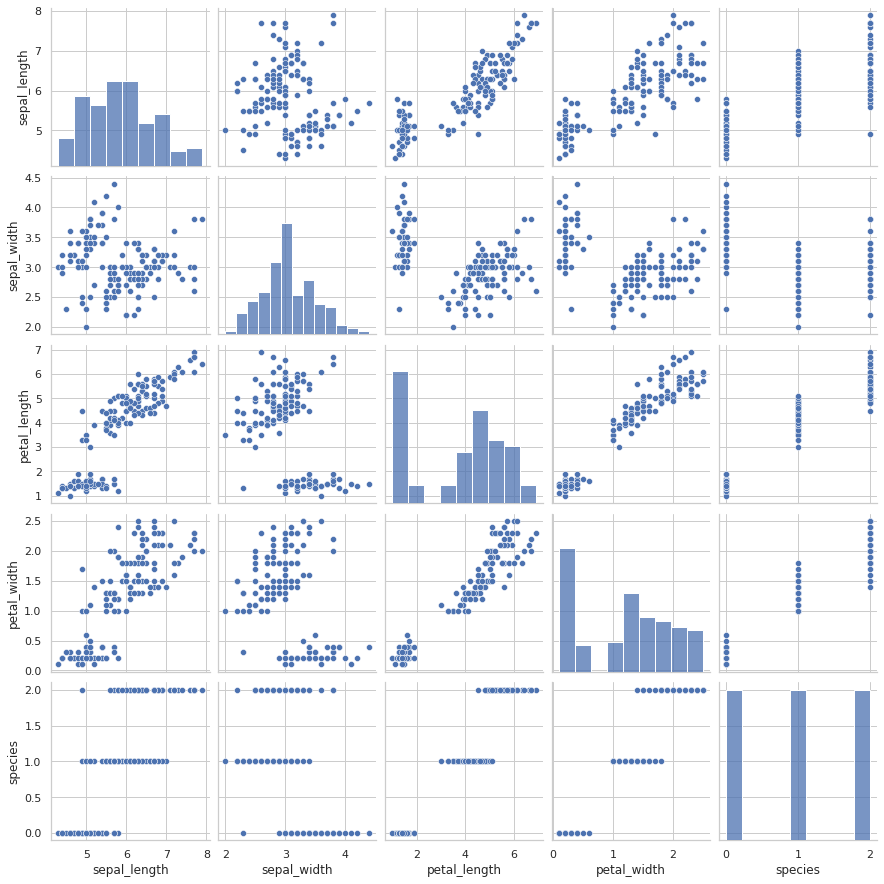

In [75]:
sns.pairplot(iris)